# Assignment No 5

Consider a suitable text dataset. Remove stop words, apply stemming and feature selection 
techniques to represent documents as vectors. Classify documents and evaluate precision, recall. 
(For Ex: Movie Review Dataset).

In [46]:
import pandas as pd
import re
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [47]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
df=pd.read_csv("movie_reviews.csv")
df.head()

,Unnamed: 0,title,rating,review_body
0,0,How's the Josh 🔥,8,The music and weapons reminded me of pubg 😝hon...
1,1,Excellent Movie... Well made,9,The movie was very gripping from the very star...
2,2,Best war/military movie from india,8,No doubt this is the best war/ military movie ...
3,3,A Masterpiece!!,10,If I have to say in one word then it'd be MAST...
4,4,One of the best war movies ever,10,This movie is so real.\nDirection is superb.\n...


# Data Exploration

In [49]:
df.shape

(25, 4)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   25 non-null     int64 
 1   title        25 non-null     object
 2   rating       25 non-null     int64 
 3   review_body  25 non-null     object
dtypes: int64(2), object(2)
memory usage: 932.0+ bytes


In [51]:
df.describe()

,Unnamed: 0,rating
count,25.000000,25.000000
mean,12.000000,8.520000
std,7.359801,2.347339
min,0.000000,1.000000
25%,6.000000,8.000000
50%,12.000000,10.000000
75%,18.000000,10.000000
max,24.000000,10.000000


# Exploratory Data Analysis

In [52]:
df.isnull().sum()

Unnamed: 0     0
title          0
rating         0
review_body    0
dtype: int64

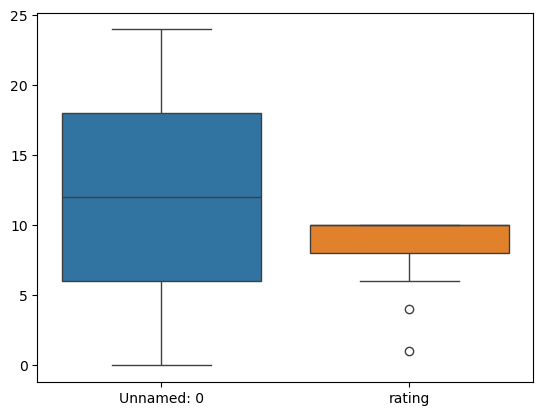

In [53]:
sns.boxplot(df)
plt.show()

In [54]:
# Apply IQR method for each numeric column

Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

    # Filter the outliers
df = df[(df['rating'] >= lower_bound) & (df['rating'] <= upper_bound)]
df
    

,Unnamed: 0,title,rating,review_body
0,0,How's the Josh 🔥,8,The music and weapons reminded me of pubg 😝hon...
1,1,Excellent Movie... Well made,9,The movie was very gripping from the very star...
2,2,Best war/military movie from india,8,No doubt this is the best war/ military movie ...
3,3,A Masterpiece!!,10,If I have to say in one word then it'd be MAST...
4,4,One of the best war movies ever,10,This movie is so real.\nDirection is superb.\n...
5,5,A perfect tribute our Indian Army,10,Watched a wartime movie after long time but I ...
6,6,Excellent movie,10,Excellent movie loved it this is the first Ind...
7,7,I've never seen something like this in bollywood,10,"Hats off to cinematographer , director, script..."
8,8,Great movie.,10,Huge respect for our soldiers who put their li...
9,9,How's the Film? Okay Sir.,6,Cinematically flawed yet a praiseworthy attemp...


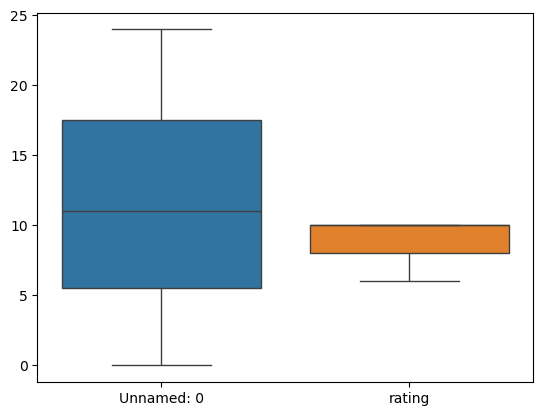

In [55]:
sns.boxplot(df)
plt.show()

In [56]:
# Preprocessing
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))


# Step 1: Data Preprocessing

In [67]:
# Download NLTK resources
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Apply stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing
data['processed_review'] = data['review_body'].apply(preprocess_text)



In [69]:
data['processed_review']

0     music weapon remind pubg honestli love vicki k...
1     movi grip start excel round act especi vicki k...
2     doubt best war militari movi made india found ...
3     say one word itd masterpiec well classica cult...
4     movi real direct superb vicki kausal brilliant...
5     watch wartim movi long time must say one best ...
6     excel movi love first indian movi repres moder...
7     hat cinematograph director script writer indiv...
8     huge respect soldier put life risk neutral ter...
9     cinemat flaw yet praiseworthi attempt depict e...
10    awesom movi fill real execut stori great sunni...
11    great war movi dont glorifi bloodsh war what g...
12    better watch documentari avail uri surgic stri...
13    charact done fantast job well written direct a...
14    urith surgic strike one best indian war film o...
15    awesom movi watch theater act super awesom vic...
16    perfect paisa wasool vicki kaushal brilliant n...
17    reccomend everyon watch movi found help re

In [70]:
# Convert ratings to binary classes (positive: 7-10, negative: 1-6)
data['sentiment'] = data['rating'].apply(lambda x: 'positive' if x >= 7 else 'negative')
data['sentiment']

0     positive
1     positive
2     positive
3     positive
4     positive
5     positive
6     positive
7     positive
8     positive
9     negative
10    positive
11    negative
12    negative
13    positive
14    positive
15    positive
16    positive
17    positive
18    positive
19    positive
20    positive
21    negative
22    negative
23    positive
24    positive
Name: sentiment, dtype: object

# Step 2: Feature Extraction (TF-IDF Vectorization)

In [71]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)  # Limiting to top 1000 features
X = tfidf.fit_transform(data['processed_review'])
y = data['sentiment']


In [72]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training and Evaluation

In [73]:
# Train Naive Bayes classifier
classifier = MultinomialNB()
classifier

MultinomialNB()

In [74]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [75]:
# Predictions
y_pred = classifier.predict(X_test)

In [76]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
